In [151]:
# Some standard essential imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Set random seed for notebook
random.seed(42)

In [153]:
data = pd.read_excel('2022QUB.xlsx', sheet_name='Data')

##Data Preprocessing

In [154]:
data.shape

(3801, 516)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Columns: 516 entries, SID to I512
dtypes: float64(512), int64(1), object(3)
memory usage: 15.0+ MB


In [159]:
data.head()

,SID,Type,Matrix,Load,I001,I002,I003,I004,I005,I006,...,I503,I504,I505,I506,I507,I508,I509,I510,I511,I512
0,S1,X,dmem,1,97.78,97.73,97.68,97.70,97.73,97.73,...,83.38,84.49,84.94,85.47,86.16,86.79,87.12,87.20,87.58,88.20
1,S1,X,dmem,1,97.75,97.70,97.70,97.71,97.71,97.72,...,83.65,84.77,85.34,85.27,85.69,85.52,85.27,85.28,85.41,85.65
2,S1,X,dmem,1,97.76,97.72,97.70,97.74,97.71,97.71,...,84.46,85.38,86.03,86.38,86.77,87.10,87.14,86.89,87.14,87.79
3,S1,X,dmem,1,97.72,97.71,97.71,97.73,97.70,97.71,...,83.96,84.89,85.43,85.30,85.80,86.18,86.39,86.63,87.21,87.76
4,S1,X,dmem,1,97.74,97.66,97.65,97.68,97.67,97.65,...,83.65,84.02,84.33,84.53,85.14,85.40,85.41,85.42,85.88,85.87


In [161]:
data.tail()

,SID,Type,Matrix,Load,I001,I002,I003,I004,I005,I006,...,I503,I504,I505,I506,I507,I508,I509,I510,I511,I512
3796,S4,Y,pbs,8,93.44,93.46,93.47,93.40,93.37,93.39,...,85.80,86.40,87.05,87.59,87.83,88.15,88.67,88.93,89.01,89.61
3797,S4,Y,pbs,8,93.68,93.58,93.55,93.47,93.40,93.41,...,85.30,85.65,85.60,85.74,86.54,87.18,87.63,87.65,87.72,88.06
3798,S4,Y,pbs,8,93.66,93.65,93.64,93.57,93.51,93.48,...,86.19,86.55,86.56,86.90,87.32,87.34,87.34,87.63,88.10,88.82
3799,S4,Y,pbs,8,93.20,93.19,93.27,93.25,93.23,93.20,...,85.55,86.02,86.48,86.85,86.90,87.07,87.31,87.51,88.15,89.05
3800,S4,Y,pbs,8,93.44,93.34,93.30,93.28,93.26,93.26,...,85.77,85.89,85.83,86.28,86.66,87.04,87.58,87.57,87.37,87.38


In [163]:
data.describe()

,Load,I001,I002,I003,I004,I005,I006,I007,I008,I009,...,I503,I504,I505,I506,I507,I508,I509,I510,I511,I512
count,3801.000000,3801.00000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,...,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,4.015259,94.65562,94.645662,94.640797,94.629976,94.617727,94.609816,94.577929,94.550316,94.531181,...,85.624488,86.004936,86.365491,86.747143,87.125264,87.331589,87.534875,87.741886,87.914770,88.071718
std,2.067487,2.57733,2.584697,2.584932,2.591785,2.593300,2.588944,2.585280,2.575187,2.572254,...,2.130029,2.181635,2.215189,2.232610,2.246044,2.286217,2.299715,2.304504,2.331248,2.379595
min,1.000000,80.95000,80.890000,80.830000,80.800000,80.760000,80.840000,80.910000,80.890000,80.830000,...,71.640000,71.950000,72.190000,72.550000,73.030000,73.210000,73.290000,73.240000,73.110000,72.940000
25%,2.000000,92.87000,92.870000,92.860000,92.820000,92.800000,92.760000,92.740000,92.750000,92.740000,...,84.500000,84.830000,85.180000,85.590000,85.940000,86.120000,86.290000,86.450000,86.570000,86.700000
50%,4.000000,94.53000,94.510000,94.520000,94.510000,94.480000,94.490000,94.440000,94.430000,94.410000,...,86.000000,86.430000,86.760000,87.110000,87.490000,87.670000,87.840000,88.020000,88.180000,88.300000
75%,6.000000,96.07000,96.040000,96.030000,96.030000,96.020000,96.030000,96.010000,95.970000,95.940000,...,87.070000,87.530000,87.900000,88.260000,88.640000,88.900000,89.170000,89.380000,89.570000,89.730000
max,8.000000,100.71000,100.620000,100.550000,100.540000,100.540000,100.440000,100.310000,100.230000,100.220000,...,90.100000,90.810000,91.300000,91.650000,91.900000,92.090000,92.410000,92.600000,92.960000,93.580000


##Feature Engineering

In [165]:
data.isnull().mean()*100

SID       0.0
Type      0.0
Matrix    0.0
Load      0.0
I001      0.0
         ... 
I508      0.0
I509      0.0
I510      0.0
I511      0.0
I512      0.0
Length: 516, dtype: float64

In [167]:
data['Type'].value_counts()

Type
Y    2281
X    1520
Name: count, dtype: int64

In [169]:
numerical_features = [feature for feature in data if data[feature].dtype != 'O']
print(numerical_features)
len(numerical_features)

['Load', 'I001', 'I002', 'I003', 'I004', 'I005', 'I006', 'I007', 'I008', 'I009', 'I010', 'I011', 'I012', 'I013', 'I014', 'I015', 'I016', 'I017', 'I018', 'I019', 'I020', 'I021', 'I022', 'I023', 'I024', 'I025', 'I026', 'I027', 'I028', 'I029', 'I030', 'I031', 'I032', 'I033', 'I034', 'I035', 'I036', 'I037', 'I038', 'I039', 'I040', 'I041', 'I042', 'I043', 'I044', 'I045', 'I046', 'I047', 'I048', 'I049', 'I050', 'I051', 'I052', 'I053', 'I054', 'I055', 'I056', 'I057', 'I058', 'I059', 'I060', 'I061', 'I062', 'I063', 'I064', 'I065', 'I066', 'I067', 'I068', 'I069', 'I070', 'I071', 'I072', 'I073', 'I074', 'I075', 'I076', 'I077', 'I078', 'I079', 'I080', 'I081', 'I082', 'I083', 'I084', 'I085', 'I086', 'I087', 'I088', 'I089', 'I090', 'I091', 'I092', 'I093', 'I094', 'I095', 'I096', 'I097', 'I098', 'I099', 'I100', 'I101', 'I102', 'I103', 'I104', 'I105', 'I106', 'I107', 'I108', 'I109', 'I110', 'I111', 'I112', 'I113', 'I114', 'I115', 'I116', 'I117', 'I118', 'I119', 'I120', 'I121', 'I122', 'I123', 'I124',

513

In [171]:
continuous_features = [feature for feature in numerical_features if len(data[feature].unique())>20]
print(continuous_features)
len(continuous_features)

['I001', 'I002', 'I003', 'I004', 'I005', 'I006', 'I007', 'I008', 'I009', 'I010', 'I011', 'I012', 'I013', 'I014', 'I015', 'I016', 'I017', 'I018', 'I019', 'I020', 'I021', 'I022', 'I023', 'I024', 'I025', 'I026', 'I027', 'I028', 'I029', 'I030', 'I031', 'I032', 'I033', 'I034', 'I035', 'I036', 'I037', 'I038', 'I039', 'I040', 'I041', 'I042', 'I043', 'I044', 'I045', 'I046', 'I047', 'I048', 'I049', 'I050', 'I051', 'I052', 'I053', 'I054', 'I055', 'I056', 'I057', 'I058', 'I059', 'I060', 'I061', 'I062', 'I063', 'I064', 'I065', 'I066', 'I067', 'I068', 'I069', 'I070', 'I071', 'I072', 'I073', 'I074', 'I075', 'I076', 'I077', 'I078', 'I079', 'I080', 'I081', 'I082', 'I083', 'I084', 'I085', 'I086', 'I087', 'I088', 'I089', 'I090', 'I091', 'I092', 'I093', 'I094', 'I095', 'I096', 'I097', 'I098', 'I099', 'I100', 'I101', 'I102', 'I103', 'I104', 'I105', 'I106', 'I107', 'I108', 'I109', 'I110', 'I111', 'I112', 'I113', 'I114', 'I115', 'I116', 'I117', 'I118', 'I119', 'I120', 'I121', 'I122', 'I123', 'I124', 'I125',

512

In [12]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<=20]
print(discrete_features)
len(discrete_features)

['Load']


1

In [173]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print(f"Found {len(duplicate_rows)} duplicate rows.")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [175]:
#corr_matrix["Load"].sort_values(ascending=False)
data['SID'].value_counts()

SID
S4    1150
S2    1100
S3    1100
S1     451
Name: count, dtype: int64

In [177]:
#df_one_hot = pd.get_dummies(data, columns=['Type','Matrix'], prefix=['Type','Matrix'])
#rint("\nOne-Hot Encoded DataFrame:")
#print(df_one_hot)
categorical_features = [feature for feature in data if data[feature].dtype == 'O']
print(categorical_features)
len(categorical_features)
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['Load'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

['SID', 'Type', 'Matrix']


In [179]:
data.head()

,SID,Type,Matrix,Load,I001,I002,I003,I004,I005,I006,...,I503,I504,I505,I506,I507,I508,I509,I510,I511,I512
0,0,0,1,1,97.78,97.73,97.68,97.70,97.73,97.73,...,83.38,84.49,84.94,85.47,86.16,86.79,87.12,87.20,87.58,88.20
1,0,0,1,1,97.75,97.70,97.70,97.71,97.71,97.72,...,83.65,84.77,85.34,85.27,85.69,85.52,85.27,85.28,85.41,85.65
2,0,0,1,1,97.76,97.72,97.70,97.74,97.71,97.71,...,84.46,85.38,86.03,86.38,86.77,87.10,87.14,86.89,87.14,87.79
3,0,0,1,1,97.72,97.71,97.71,97.73,97.70,97.71,...,83.96,84.89,85.43,85.30,85.80,86.18,86.39,86.63,87.21,87.76
4,0,0,1,1,97.74,97.66,97.65,97.68,97.67,97.65,...,83.65,84.02,84.33,84.53,85.14,85.40,85.41,85.42,85.88,85.87


In [181]:
print(data["Load"])

0       1
1       1
2       1
3       1
4       1
       ..
3796    8
3797    8
3798    8
3799    8
3800    8
Name: Load, Length: 3801, dtype: int64


In [183]:
data['Load'].value_counts()

Load
4    770
3    720
2    671
1    360
5    320
6    320
7    320
8    320
Name: count, dtype: int64

##Checking features by plotting

In [295]:
data['Type'].value_counts()


Type
1    2281
0    1520
Name: count, dtype: int64

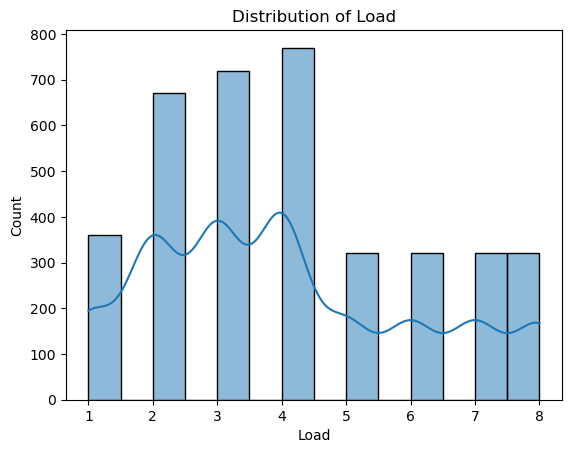

In [185]:
# Histogram of a Load column
sns.histplot(data['Load'], kde=True)
plt.title("Distribution of Load")
plt.show()

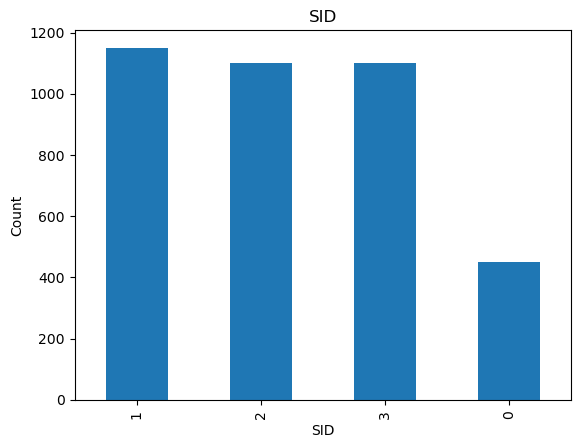

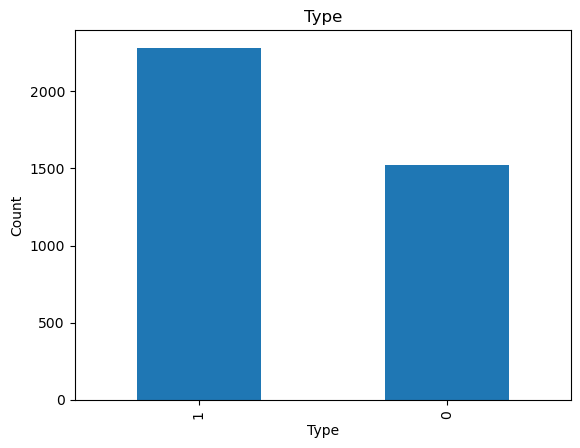

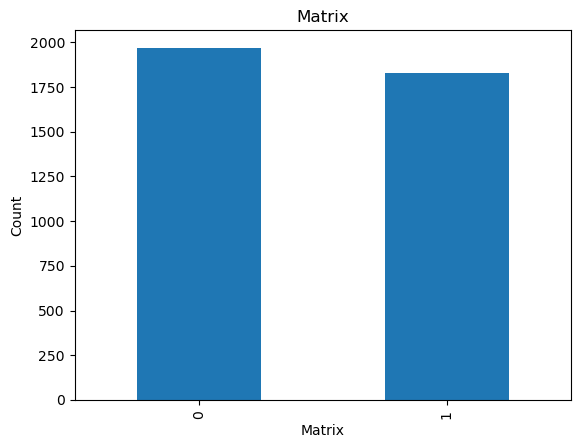

In [187]:
for feature in categorical_features:
  data = data.copy()
  data[feature].value_counts().plot(kind='bar')
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

##Checking relationship between features

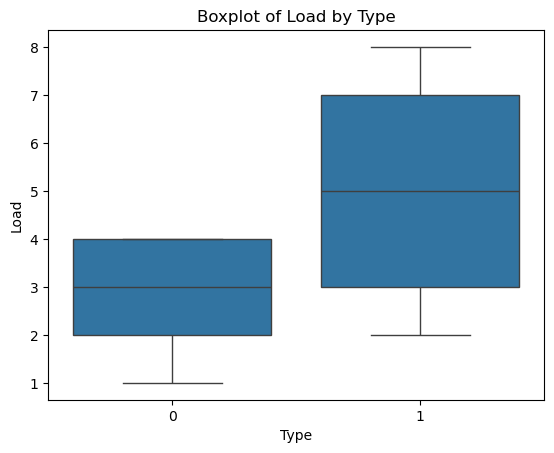

In [189]:
# Example: Load vs Type
sns.boxplot(x="Type", y="Load", data=data)
plt.title("Boxplot of Load by Type")
plt.show()

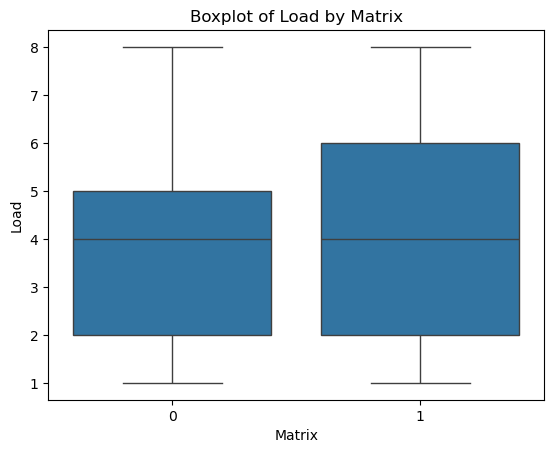

In [22]:
# Example: Load vs Type
sns.boxplot(x="Matrix", y="Load", data=data)
plt.title("Boxplot of Load by Matrix")
plt.show()

Highly correlated features with target: Index(['Load', 'Type'], dtype='object')


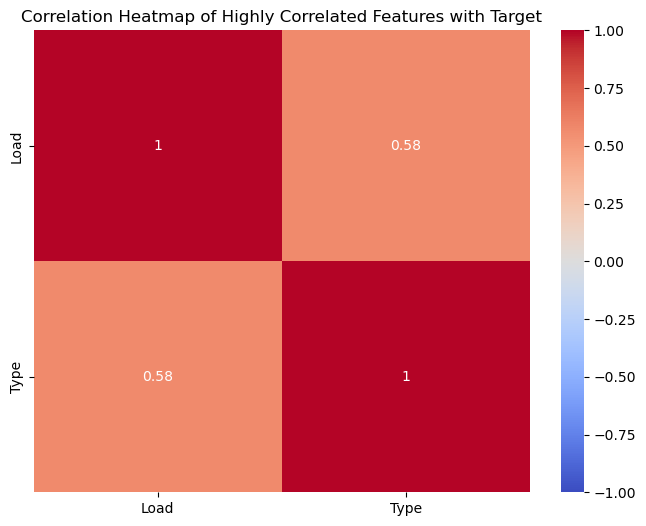

In [23]:
# Correlation with the target variable
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlations = data[num_features].corr()["Load"].abs().sort_values(ascending=False)

# Filtering features with high correlation with the target
high_corr_features = correlations[correlations > 0.5].index
print("Highly correlated features with target:", high_corr_features)

# Plot heatmap for these high-correlation features only
plt.figure(figsize=(8, 6))
sns.heatmap(data[high_corr_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Highly Correlated Features with Target")
plt.show()

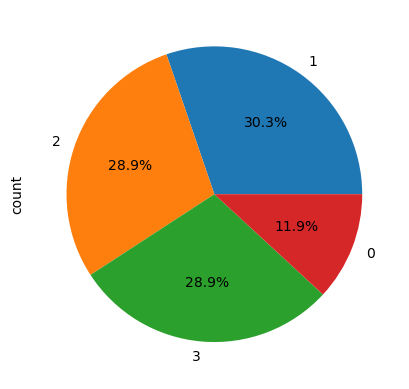

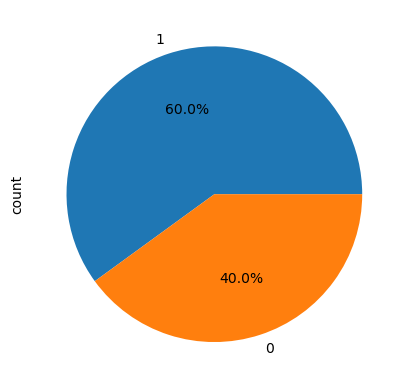

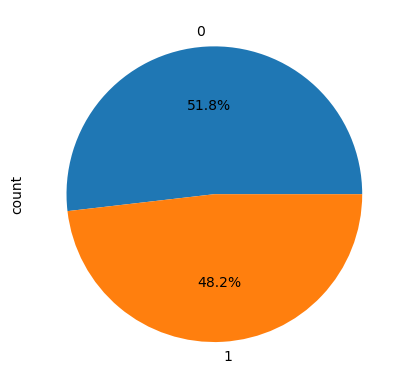

In [24]:
for feature in categorical_features:
  data = data.copy()
  data[feature].value_counts().plot(kind='pie',autopct='%0.1f%%')
  plt.show()

##Feature Engineering

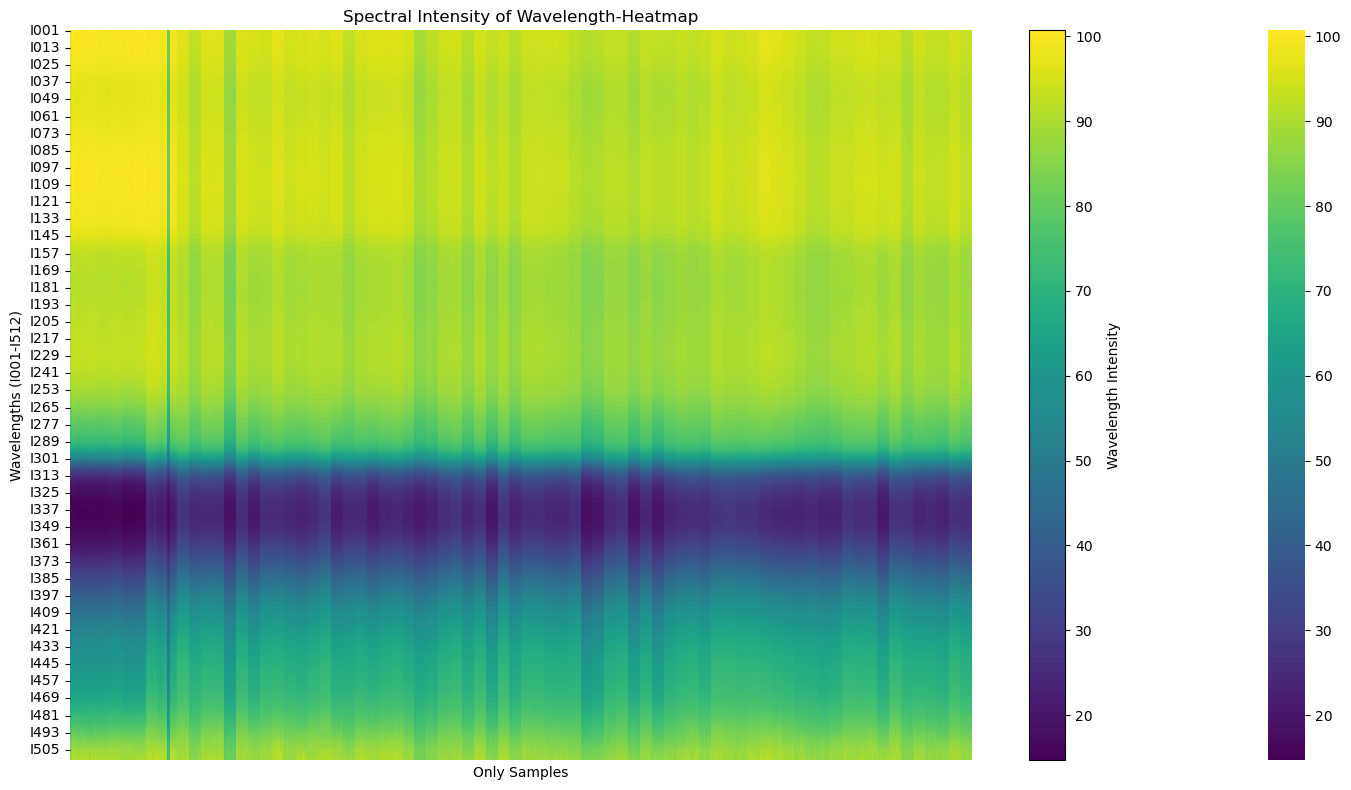

In [191]:
# Get only the wavelength intensity columns (I001 to I512)
wavelength_columns = [col for col in data.columns if col.startswith('I')]
wavelength_data = data[wavelength_columns]

# Create the heatmap with inverted colors
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(wavelength_data.T, cmap='viridis', xticklabels=False)   

plt.title('Spectral Intensity of Wavelength-Heatmap')
plt.xlabel('Only Samples')
plt.ylabel('Wavelengths (I001-I512)')

# Add a colorbar label
plt.colorbar(heatmap.collections[0], label='Wavelength Intensity')

plt.tight_layout()
plt.show()

In [193]:
# Step 2: Calculate the correlation matrix
corr_matrix = data.corr()
corr_matrix["Load"].sort_values(ascending=False)

Load    1.000000
Type    0.577573
I370    0.068442
I371    0.068358
I369    0.068273
          ...   
I005   -0.200527
I001   -0.200705
I003   -0.202056
I004   -0.202215
I002   -0.202536
Name: Load, Length: 516, dtype: float64

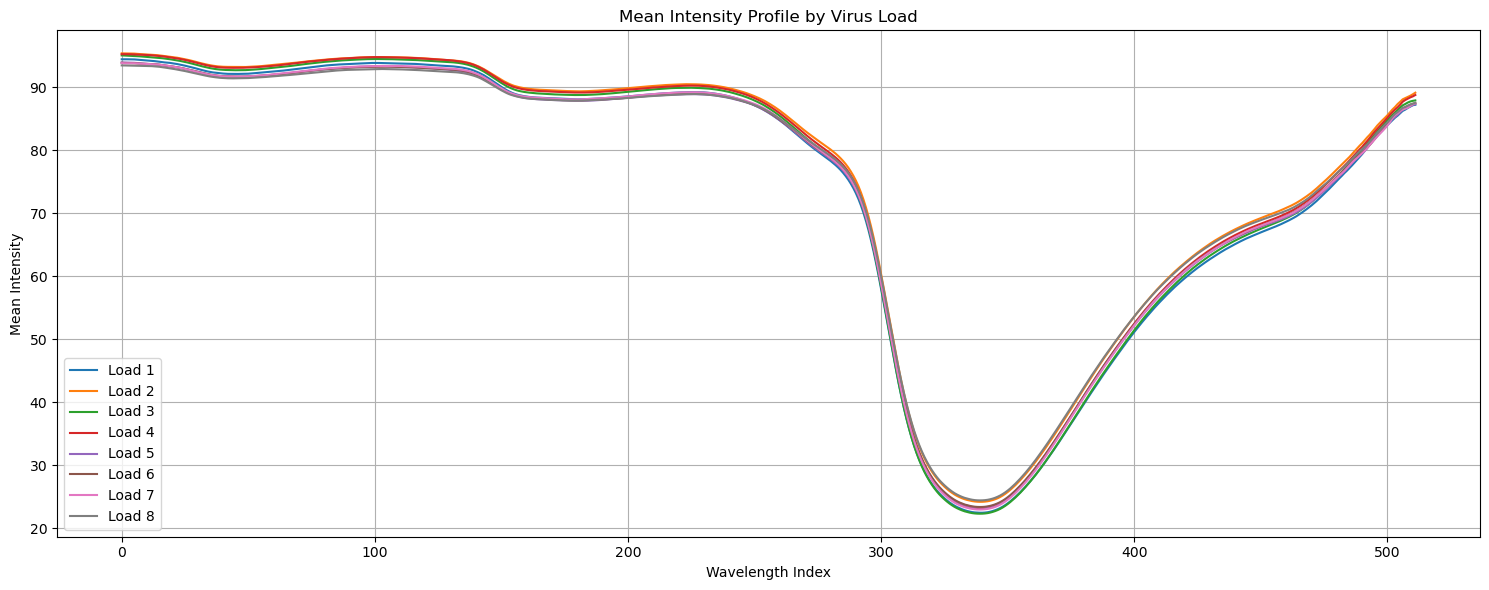

In [195]:
# Mean intensity profile for each virus type
plt.figure(figsize=(15, 6))
for virus_load in data['Load'].unique():
    virus_data = data[data['Load'] == virus_load][wavelength_columns]
    mean_intensity = virus_data.mean()

    plt.plot(range(len(wavelength_columns)),
             mean_intensity.values,
             label=f'Load {virus_load}')

plt.title('Mean Intensity Profile by Virus Load')
plt.xlabel('Wavelength Index')
plt.ylabel('Mean Intensity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [197]:
correlation = data["Load"].corr(data["Matrix"])
correlation

0.028032931312398698

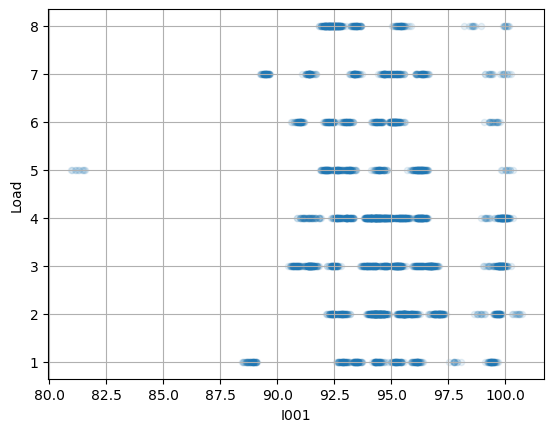

In [199]:
# Scatter plot of Load vs. wavelength
data.plot(kind="scatter", x="I001", y="Load",
             alpha=0.1, grid=True)
plt.show()

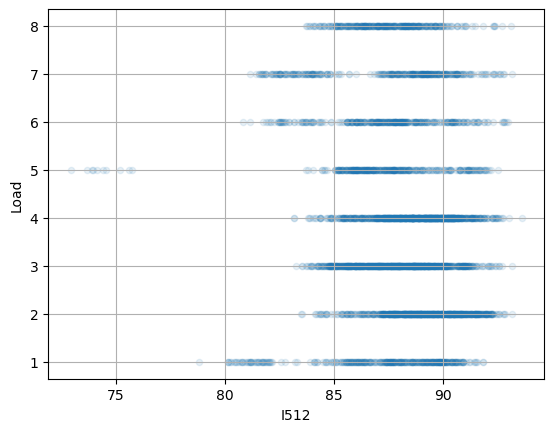

In [135]:
# Scatter plot of Load vs. wavelength
data.plot(kind="scatter", x="I512", y="Load",
             alpha=0.1, grid=True)
plt.show()

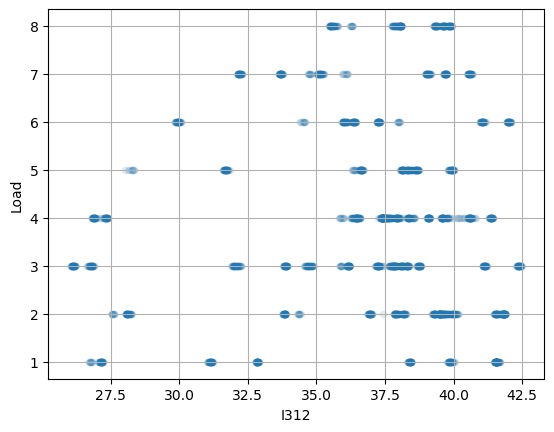

In [137]:
# Scatter plot of Load vs. wavelength
data.plot(kind="scatter", x="I312", y="Load",
             alpha=0.1, grid=True)
plt.show()

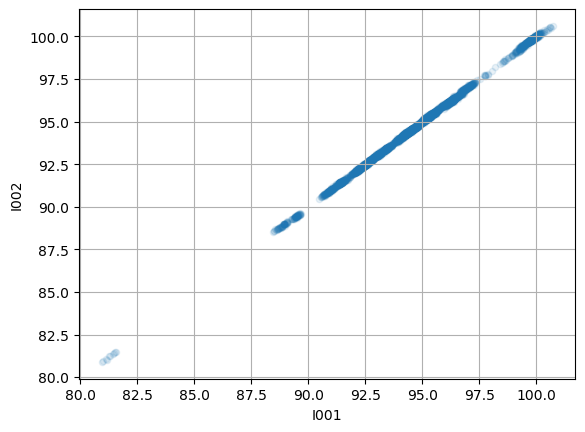

In [30]:
# Scatter plot of one wavelength vs. other wavelength
data.plot(kind="scatter", x="I001", y="I002",
             alpha=0.1, grid=True)
plt.show()

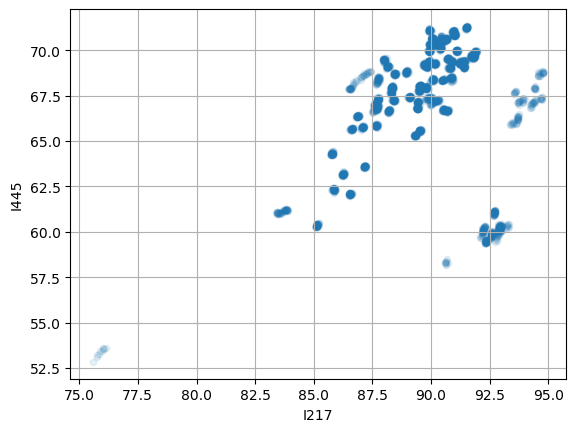

In [143]:
# Scatter plot of Load vs. wavelength
data.plot(kind="scatter", x="I217", y="I445",
             alpha=0.1, grid=True)
plt.show()

In [201]:
# Dropping the 'SID' feature from the dataset
data = data.drop(columns=['SID'])

In [203]:
data.head()

,Type,Matrix,Load,I001,I002,I003,I004,I005,I006,I007,...,I503,I504,I505,I506,I507,I508,I509,I510,I511,I512
0,0,1,1,97.78,97.73,97.68,97.70,97.73,97.73,97.72,...,83.38,84.49,84.94,85.47,86.16,86.79,87.12,87.20,87.58,88.20
1,0,1,1,97.75,97.70,97.70,97.71,97.71,97.72,97.74,...,83.65,84.77,85.34,85.27,85.69,85.52,85.27,85.28,85.41,85.65
2,0,1,1,97.76,97.72,97.70,97.74,97.71,97.71,97.74,...,84.46,85.38,86.03,86.38,86.77,87.10,87.14,86.89,87.14,87.79
3,0,1,1,97.72,97.71,97.71,97.73,97.70,97.71,97.70,...,83.96,84.89,85.43,85.30,85.80,86.18,86.39,86.63,87.21,87.76
4,0,1,1,97.74,97.66,97.65,97.68,97.67,97.65,97.69,...,83.65,84.02,84.33,84.53,85.14,85.40,85.41,85.42,85.88,85.87


In [205]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['Load'])  # Drop the target column from features
y = data['Load']  # Target variable

# Apply train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 3040
Testing set size: 761


In [207]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Optional: Convert scaled arrays back to DataFrames if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the scaled training data
print(X_train_scaled.head())

       Type    Matrix      I001      I002      I003      I004      I005  \
0  0.820419  1.024646  0.967553  0.972893  0.971064  0.945472  0.926520   
1 -1.218889 -0.975947  0.520966  0.492066  0.509915  0.512939  0.521653   
2 -1.218889  1.024646 -0.925503 -0.918888 -0.901124 -0.886894 -0.861970   
3 -1.218889  1.024646  0.105996  0.097944  0.084238  0.060746  0.042102   
4  0.820419 -0.975947  0.319409  0.298946  0.273428  0.284877  0.281877   

       I006      I007      I008  ...      I503      I504      I505      I506  \
0  0.927064  0.929063  0.892157  ...  1.936095  1.949529  2.173803  2.093207   
1  0.517645  0.542742  0.559705  ...  0.431620  0.360720  0.450275  0.494573   
2 -0.840524 -0.817265 -0.797811  ... -0.949848 -0.853980 -0.818496 -1.009493   
3  0.049175  0.026334  0.017490  ... -0.084065 -0.128855  0.009161 -0.153886   
4  0.281442  0.294393  0.290576  ...  0.843222  0.993472  1.059649  1.215084   

       I507      I508      I509      I510      I511      I512  
0  1

In [209]:
### Do linear regression using sklearn 
from sklearn.linear_model import LinearRegression

# Get only intensity columns
wavelength_columns = [col for col in X_train_scaled.columns if col.startswith('I')]

# Create model using only intensity features
X_train_wavelength = X_train_scaled[wavelength_columns]
X_test_wavelength= X_test_scaled[wavelength_columns]

#Create and fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train_wavelength, y_train)

LinearRegression()

In [211]:
### Make predictions and evaluate model against test set (choose appropriate metrics)

y_pred_train = lin_reg.predict(X_train_wavelength)
y_pred_test = lin_reg.predict(X_test_wavelength)

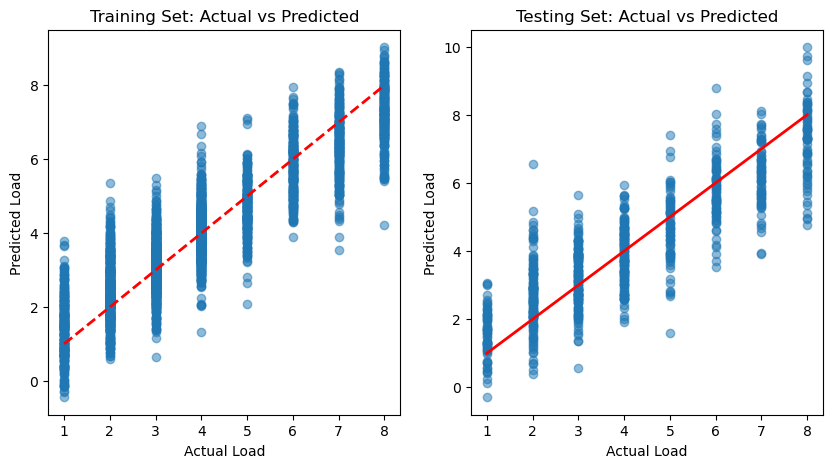

In [213]:
# Plot data as a scatter plot with the obtained linear best fit line
plt.figure(figsize=(10, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.title('Training Set: Actual vs Predicted')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.title('Testing Set: Actual vs Predicted')
plt.show()



In [225]:
y_train

862     2
734     2
505     2
1647    2
1242    2
       ..
1130    7
1294    3
860     2
3507    4
3174    4
Name: Load, Length: 3040, dtype: int64

In [227]:
y_test

1003    5
594     3
461     1
3018    4
3091    2
       ..
2480    5
2004    3
3022    4
3411    2
246     3
Name: Load, Length: 761, dtype: int64

In [215]:
#Residual Analysis
residual_train = y_train - y_pred_train
print(residual_train)
residual_test = y_test - y_pred_test
print(residual_test)

862    -0.439282
734    -0.161383
505    -0.210816
1647   -0.553330
1242    0.150908
          ...   
1130   -0.911904
1294    0.682318
860     0.940308
3507   -0.453117
3174    0.407895
Name: Load, Length: 3040, dtype: float64
1003   -0.335878
594    -0.128726
461    -0.226136
3018    0.604939
3091   -1.284074
          ...   
2480    1.937671
2004   -0.885901
3022    1.419209
3411    0.826287
246     0.153952
Name: Load, Length: 761, dtype: float64


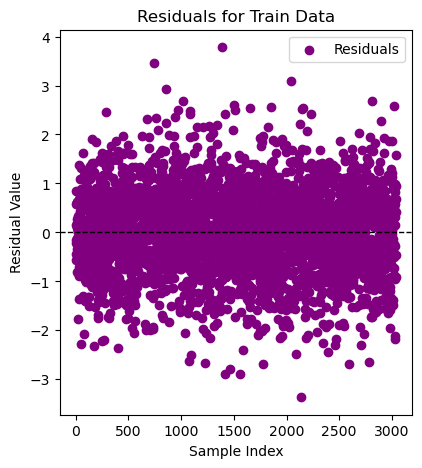

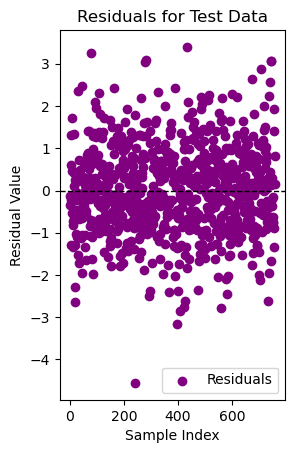

In [217]:
plt.figure(figsize=(10, 5))

# Training set
plt.subplot(1, 2, 1)
# Plotting residuals

plt.scatter(range(len(residual_train)), residual_train, color='purple', label='Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Sample Index')
plt.ylabel('Residual Value')
plt.title('Residuals for Train Data')
plt.legend()
plt.show()

# Training set
plt.subplot(1, 2, 1)
# Plotting residuals

plt.scatter(range(len(residual_test)), residual_test, color='purple', label='Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Sample Index')
plt.ylabel('Residual Value')
plt.title('Residuals for Test Data')
plt.legend()
plt.show()

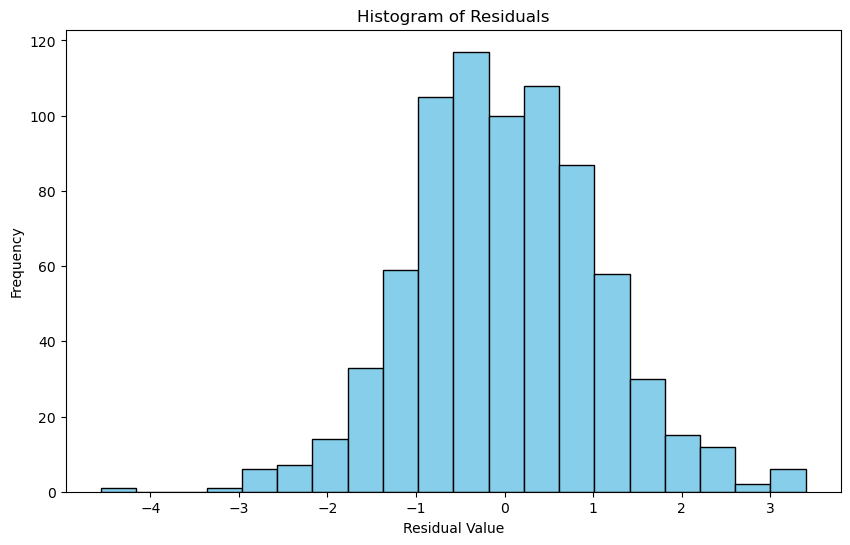

In [219]:
import matplotlib.pyplot as plt

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residual_test, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [293]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation metrics for training
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

### Print out evaluation results
print("Metrics for Training Set")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Evaluation metrics for testing
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

### Print out evaluation results
print("Metrics for Testing Set")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R² Score: {r2_test}")

### Interpret the evaluation

Metrics for Training Set
MSE: 0.7445886845942526
RMSE: 0.8628955235683243
Mean Absolute Error (MAE): 0.6798437418571879
R² Score: 0.8245824078968143
Metrics for Testing Set
MSE: 1.1271589566876756
RMSE: 1.061677425910373
Mean Absolute Error (MAE): 0.8403957022408857
R² Score: 0.7424683226169718


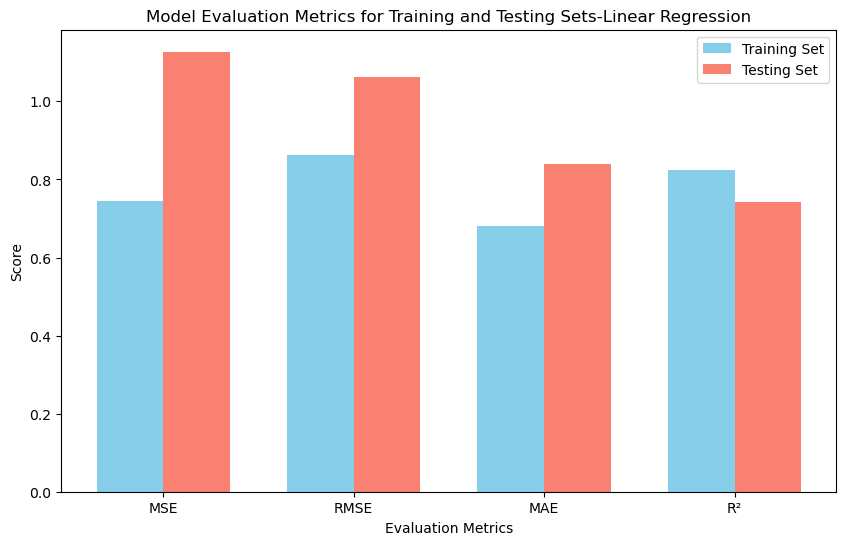

In [313]:
# Evaluation metrics for training
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

# Evaluation metrics for testing
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


# Metrics for plotting
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
train_metrics = [mse, rmse, mae, r2]
test_metrics = [mse_test, rmse_test, mae_test, r2_test]

# Plotting the metrics
x = np.arange(len(metrics))
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_metrics, width, label='Training Set', color='skyblue')
plt.bar(x + width/2, test_metrics, width, label='Testing Set', color='salmon')

# Adding labels and title
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics for Training and Testing Sets-Linear Regression")
plt.xticks(x, metrics)
plt.legend()
plt.show()

In [301]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create Linear Regression model using only intensity features
lin_reg = LinearRegression()
lin_reg.fit(X_train_wavelength, y_train)

# Predict using Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test_wavelength)

# Calculate RMSE for Linear Regression
rmse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
print(f"Linear Regression RMSE: {rmse_lin_reg}")

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_wavelength, y_train)

# Predict using Decision Tree
y_pred_dt = dt_model.predict(X_test_wavelength)

# Calculate RMSE for Decision Tree
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print(f"Decision Tree RMSE: {rmse_dt}")

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_wavelength, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test_wavelength)

# Calculate RMSE for Random Forest
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf}")

/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE: 1.061677425910373


/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree RMSE: 0.3853424846629325
Random Forest RMSE: 0.1997389886840464


/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


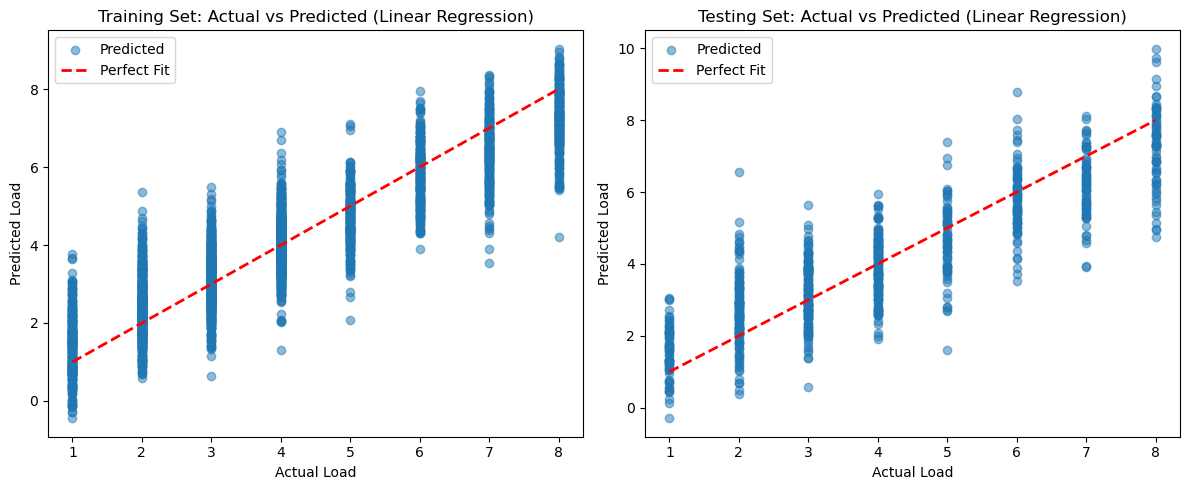

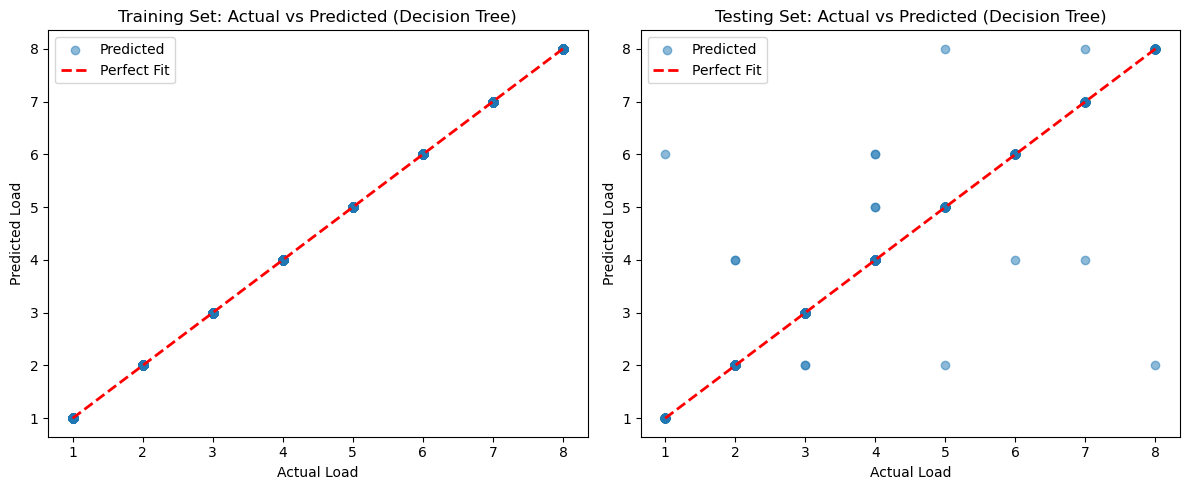

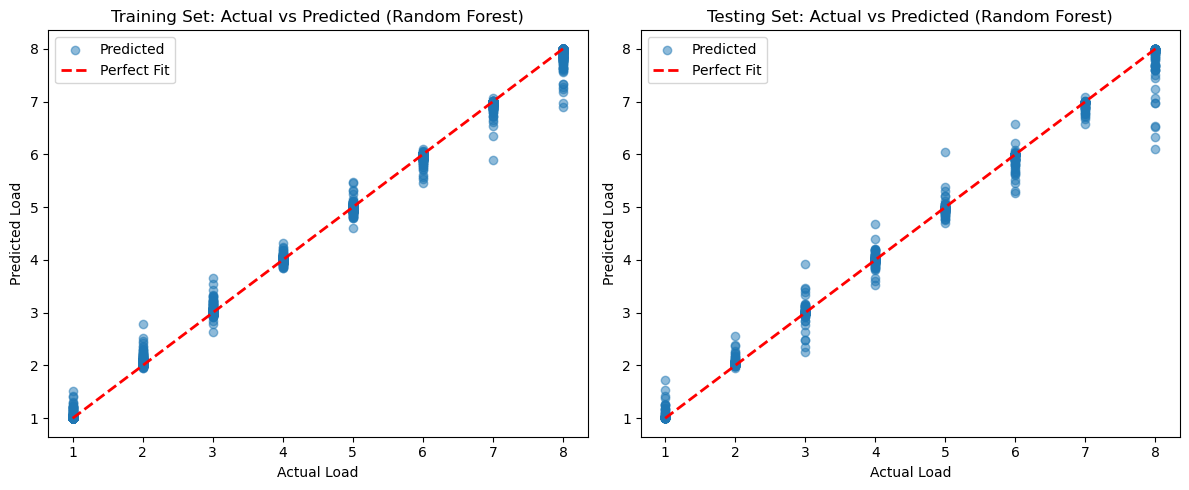

In [307]:
# Function to plot Actual vs Predicted values for both training and test sets
def plot_actual_vs_predicted(y_train, y_pred_train, y_test, y_pred_test, model_name):
    plt.figure(figsize=(12, 5))

    # Training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_pred_train, alpha=0.5, label='Predicted')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Load')
    plt.ylabel('Predicted Load')
    plt.title(f'Training Set: Actual vs Predicted ({model_name})')
    plt.legend()

    # Test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_test, alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Load')
    plt.ylabel('Predicted Load')
    plt.title(f'Testing Set: Actual vs Predicted ({model_name})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Linear Regression - Predictions
y_pred_train_lin_reg = lin_reg.predict(X_train_wavelength)
y_pred_test_lin_reg = lin_reg.predict(X_test_wavelength)
plot_actual_vs_predicted(y_train, y_pred_train_lin_reg, y_test, y_pred_test_lin_reg, 'Linear Regression')

# Decision Tree - Predictions
y_pred_train_dt = dt_model.predict(X_train_wavelength)
y_pred_test_dt = dt_model.predict(X_test_wavelength)
plot_actual_vs_predicted(y_train, y_pred_train_dt, y_test, y_pred_test_dt, 'Decision Tree')

# Random Forest - Predictions
y_pred_train_rf = rf_model.predict(X_train_wavelength)
y_pred_test_rf = rf_model.predict(X_test_wavelength)
plot_actual_vs_predicted(y_train, y_pred_train_rf, y_test, y_pred_test_rf, 'Random Forest')

Linear Regression - Cross-validation RMSE: [1.06090193 1.08651704 1.08898432 1.0858476  1.08071377]
Decision Tree - Cross-validation RMSE: [0.5161854  0.6846532  0.60697698 0.21839727 0.60697698]
Random Forest - Cross-validation RMSE: [0.24474913 0.2729984  0.22404292 0.22016404 0.32110828]


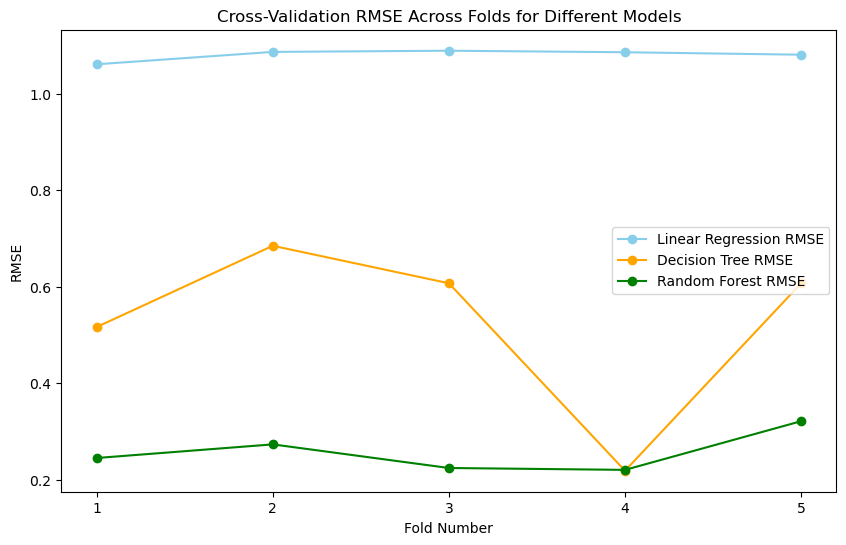

In [302]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation for Linear Regression
lin_scores = cross_val_score(lin_reg, X_train_wavelength, y_train, scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Linear Regression - Cross-validation RMSE:", lin_rmse_scores)

# Perform cross-validation for Decision Tree
dt_scores = cross_val_score(dt_model, X_train_wavelength, y_train, scoring="neg_mean_squared_error", cv=5)
dt_rmse_scores = np.sqrt(-dt_scores)
print("Decision Tree - Cross-validation RMSE:", dt_rmse_scores)

# Perform cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X_train_wavelength, y_train, scoring="neg_mean_squared_error", cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)
print("Random Forest - Cross-validation RMSE:", rf_rmse_scores)

# Convert scores to DataFrame for plotting
results_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Linear Regression': lin_rmse_scores,
    'Decision Tree': dt_rmse_scores,
    'Random Forest': rf_rmse_scores
})

# Plot RMSE values across folds for each model
plt.figure(figsize=(10, 6))
plt.plot(results_df['Fold'], results_df['Linear Regression'], marker='o', label="Linear Regression RMSE", color="skyblue")
plt.plot(results_df['Fold'], results_df['Decision Tree'], marker='o', label="Decision Tree RMSE", color="orange")
plt.plot(results_df['Fold'], results_df['Random Forest'], marker='o', label="Random Forest RMSE", color="green")

plt.title("Cross-Validation RMSE Across Folds for Different Models")
plt.xlabel("Fold Number")
plt.ylabel("RMSE")
plt.xticks(results_df['Fold'])
plt.legend()

plt.show()


In [309]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Linear Regression
lin_reg = LinearRegression()
lin_param_grid = {
    'fit_intercept': [True, False]
}
grid_search_lin = GridSearchCV(estimator=lin_reg, param_grid=lin_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search_lin.fit(X_train_wavelength, y_train)

print("Linear Regression Best Parameters:", grid_search_lin.best_params_)
print("Linear Regression Best Score (R2):", grid_search_lin.best_score_)

# Hyperparameter tuning for Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search_dt.fit(X_train_wavelength, y_train)

print("Decision Tree Best Parameters:", grid_search_dt.best_params_)
print("Decision Tree Best Score (R2):", grid_search_dt.best_score_)

# Hyperparameter tuning for Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search_rf.fit(X_train_wavelength, y_train)

print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score (R2):", grid_search_rf.best_score_)




Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression Best Parameters: {'fit_intercept': True}
Linear Regression Best Score (R2): 0.7240628404282565
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Best Score (R2): 0.937188707046506
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
355 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 

Random Forest Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Best Score (R2): 0.9933468563166226


In [311]:
# Evaluate Linear Regression on Test Data
lin_best_model = grid_search_lin.best_estimator_  # Get the best model from GridSearchCV
y_pred_lin = lin_best_model.predict(X_test_wavelength)
lin_test_score = lin_best_model.score(X_test_wavelength, y_test)  # R-squared score
print("Linear Regression Test R2 Score:", lin_test_score)

# Evaluate Decision Tree on Test Data
dt_best_model = grid_search_dt.best_estimator_  # Get the best model from GridSearchCV
y_pred_dt = dt_best_model.predict(X_test_wavelength)
dt_test_score = dt_best_model.score(X_test_wavelength, y_test)  # R-squared score
print("Decision Tree Test R2 Score:", dt_test_score)

# Evaluate Random Forest on Test Data
rf_best_model = grid_search_rf.best_estimator_  # Get the best model from GridSearchCV
y_pred_rf = rf_best_model.predict(X_test_wavelength)
rf_test_score = rf_best_model.score(X_test_wavelength, y_test)  # R-squared score
print("Random Forest Test R2 Score:", rf_test_score)


from sklearn.metrics import mean_squared_error

# Linear Regression RMSE
lin_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("Linear Regression Test RMSE:", lin_rmse_test)

# Decision Tree RMSE
dt_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Test RMSE:", dt_rmse_test)

# Random Forest RMSE
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest Test RMSE:", rf_rmse_test)


Linear Regression Test R2 Score: 0.7424683226169718
Decision Tree Test R2 Score: 0.9660734829272604
Random Forest Test R2 Score: 0.9961804146000054
Linear Regression Test RMSE: 1.061677425910373
Decision Tree Test RMSE: 0.3853424846629325
Random Forest Test RMSE: 0.12929608270919185


In [273]:
y_pred = grid_search.predict(X_test_wavelength)
print(y_pred)
r2_test = r2_score(y_test, y_pred)
print("R2 of Random Forest:",r2_test)


[4.96666667 2.99666667 1.01       4.00333333 2.12       3.06666667
 7.66333333 1.34       7.         5.63666667 2.02       2.99333333
 4.         7.         4.01666667 3.91666667 7.96333333 2.03
 6.01       2.99333333 3.01333333 3.98666667 1.02       6.96
 7.92333333 4.         4.00333333 1.00666667 1.         8.
 4.         1.38333333 7.66666667 6.99       4.22666667 7.
 3.98666667 6.         3.05       7.         5.97333333 2.01666667
 7.97       2.         4.97       5.83       4.         7.
 1.16       3.13333333 2.04       3.         7.87333333 3.
 7.93       2.00666667 1.04       3.         8.         2.00666667
 1.01666667 4.08666667 5.03       1.05       2.99666667 4.14666667
 7.57333333 6.         2.95333333 4.96333333 2.99333333 5.91333333
 3.81666667 4.         1.23       6.98666667 4.86333333 1.25
 3.98       7.56333333 4.92666667 3.01333333 2.         3.92333333
 2.05       3.         5.99333333 4.01666667 5.96666667 3.01666667
 4.89333333 2.99333333 4.01333333 3.01666667 

##Hyperparameter tuning of Best Model and Generalization

##Backward Feature Selction 

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function for backward feature selection using R² as the metric to improve
# Displays the removed features and corresponding R² scores
def backward_selection(X_train, y_train, X_test, y_test):

    # Start with all features
    remaining_features = list(X_train.columns)
    selected_features = remaining_features.copy()
    r2_scores = []

    # Initialize the model
    model = LinearRegression()

    # Fit the model with all features initially
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    best_r2 = r2_score(y_test, y_pred)
    r2_scores.append(best_r2)

    print(f"Initial R-squared with all features: {best_r2:.4f}")

    # Iterate until no further improvement
    while len(selected_features) > 1:
        worst_r2 = best_r2
        worst_feature = None

        # Try removing each feature and calculate R²
        for feature in selected_features:
            features_to_try = selected_features.copy()
            features_to_try.remove(feature)

            model.fit(X_train[features_to_try], y_train)
            y_pred = model.predict(X_test[features_to_try])
            r2 = r2_score(y_test, y_pred)

            # If removing the feature improves the model (or least reduces R-squared), track it
            if r2 >= worst_r2:
                worst_r2 = r2
                worst_feature = feature

        # If removing a feature improves R-squared or doesn't decrease it too much, remove it
        if worst_feature:
            selected_features.remove(worst_feature)
            best_r2 = worst_r2
            r2_scores.append(best_r2)
            print(f"Removed feature: {worst_feature}, R-squared: {best_r2:.4f}")
        else:
            # Stop if removing any feature worsens the model
            break

    return selected_features, r2_scores

# Run the backward selection process
selected_features, r2_scores = backward_selection(X_train_scaled, y_train, X_test_scaled, y_test)

# Final output
print("\nSelected Features after Backward Selection:")
print(selected_features)


Initial R-squared with all features: 0.7959
Removed feature: I317, R-squared: 0.7974
Removed feature: I035, R-squared: 0.7987
Removed feature: I071, R-squared: 0.8000

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total

##TRAINING AND TESTING USING SELECTED FEATURES

AttributeError: 'list' object has no attribute 'shape'

In [342]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data[selected_features]
y = data['Load']  # Target variable

# Apply train-test split
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print("Training set size:", X_train_selected.shape[0])
print("Testing set size:", X_test_selected.shape[0])

Training set size: 3040
Testing set size: 761


In [344]:
### Do linear regression using sklearn 
from sklearn.linear_model import LinearRegression

#Create and fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

LinearRegression()

In [346]:
### Make predictions and evaluate model against test set (choose appropriate metrics)

y_pred_train_selected = lin_reg.predict(X_train_selected)
y_pred_test_selected = lin_reg.predict(X_test_selected)

In [328]:
X

,I002,I003,I004,I005,I006,I007,I011,I013,I014,I016,...,I494,I497,I499,I504,I505,I506,I507,I508,I509,I510
0,97.73,97.68,97.70,97.73,97.73,97.72,97.57,97.51,97.52,97.37,...,78.03,79.92,81.40,84.49,84.94,85.47,86.16,86.79,87.12,87.20
1,97.70,97.70,97.71,97.71,97.72,97.74,97.70,97.59,97.55,97.41,...,77.95,80.70,82.52,84.77,85.34,85.27,85.69,85.52,85.27,85.28
2,97.72,97.70,97.74,97.71,97.71,97.74,97.61,97.54,97.55,97.47,...,78.55,80.89,82.59,85.38,86.03,86.38,86.77,87.10,87.14,86.89
3,97.71,97.71,97.73,97.70,97.71,97.70,97.68,97.62,97.59,97.43,...,78.38,80.21,81.42,84.89,85.43,85.30,85.80,86.18,86.39,86.63
4,97.66,97.65,97.68,97.67,97.65,97.69,97.62,97.55,97.52,97.40,...,78.69,80.63,82.12,84.02,84.33,84.53,85.14,85.40,85.41,85.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,93.46,93.47,93.40,93.37,93.39,93.41,93.56,93.51,93.47,93.37,...,81.28,82.66,83.66,86.40,87.05,87.59,87.83,88.15,88.67,88.93
3797,93.58,93.55,93.47,93.40,93.41,93.37,93.23,93.27,93.26,93.20,...,81.13,81.98,83.25,85.65,85.60,85.74,86.54,87.18,87.63,87.65
3798,93.65,93.64,93.57,93.51,93.48,93.45,93.39,93.33,93.26,93.19,...,81.69,83.26,84.52,86.55,86.56,86.90,87.32,87.34,87.34,87.63
3799,93.19,93.27,93.25,93.23,93.20,93.20,93.34,93.39,93.29,93.18,...,81.17,82.74,83.85,86.02,86.48,86.85,86.90,87.07,87.31,87.51


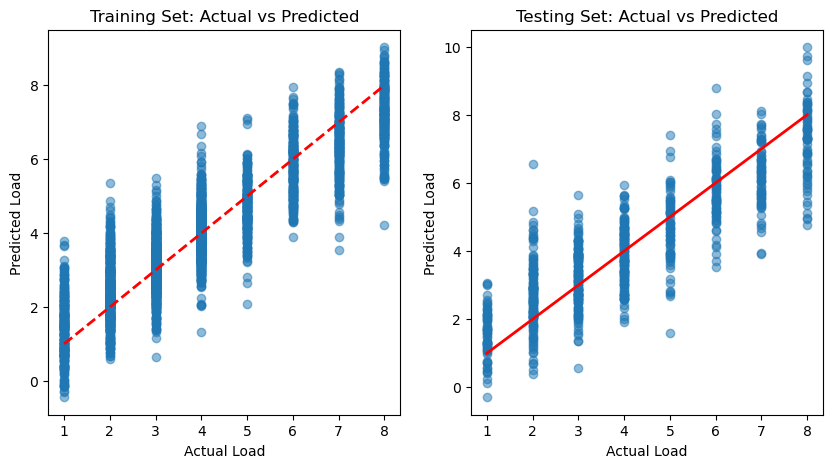

In [348]:
# Plot data as a scatter plot with the obtained linear best fit line
plt.figure(figsize=(10, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.title('Training Set: Actual vs Predicted')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.title('Testing Set: Actual vs Predicted')
plt.show()

In [350]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation metrics for training
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

### Print out evaluation results
print("Metrics for Training Set")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Evaluation metrics for testing
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

### Print out evaluation results
print("Metrics for Testing Set")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R² Score: {r2_test}")

### Interpret the evaluation

Metrics for Training Set
MSE: 0.7445886845942526
RMSE: 0.8628955235683243
Mean Absolute Error (MAE): 0.6798437418571879
R² Score: 0.8245824078968143
Metrics for Testing Set
MSE: 1.1271589566876756
RMSE: 0.8628955235683243
Mean Absolute Error (MAE): 0.8403957022408857
R² Score: 0.7424683226169718


Ridge Regression Results:
Training RMSE: 1.0884, R²: 0.7209
Test RMSE: 1.1462, R²: 0.6998

Linear Regression Results:
Training RMSE: 0.9632, R²: 0.7814
Test RMSE: 0.9536, R²: 0.7922


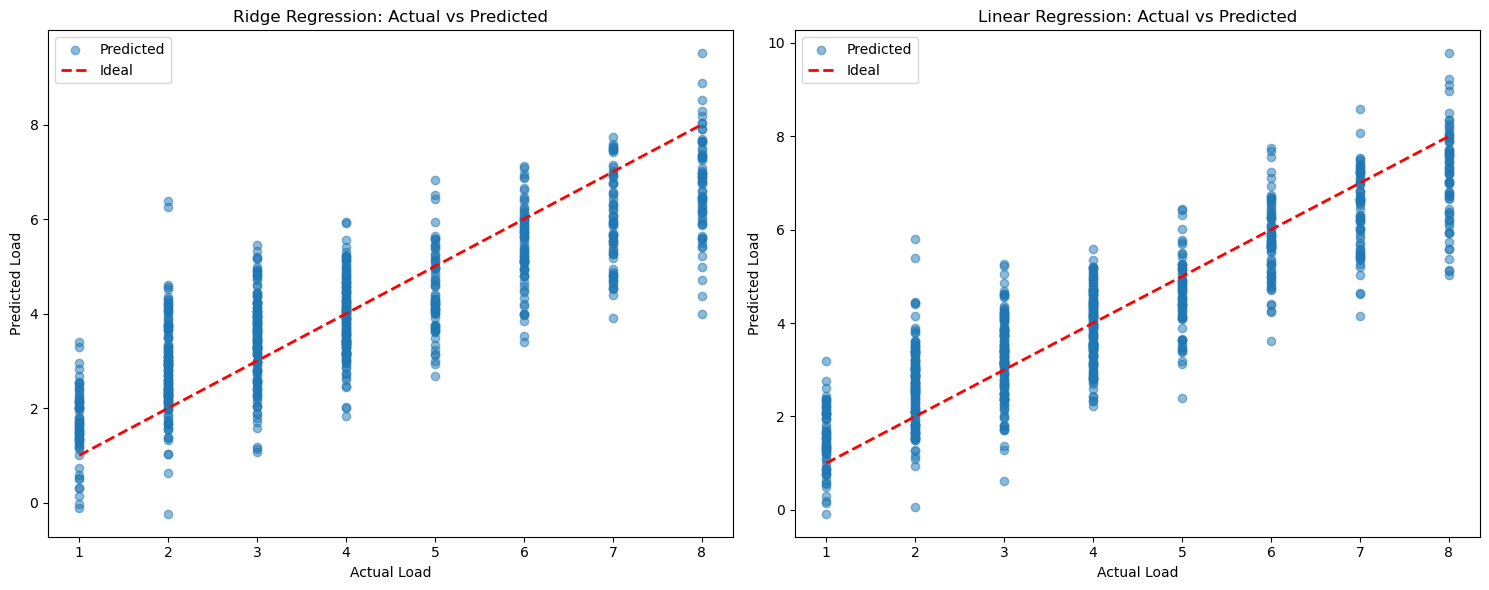

In [334]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Rest of the code remains the same
ridge_alpha = 1.0

ridge_model = Ridge(alpha=ridge_alpha)
linear_model = LinearRegression()

# Train and predict using Ridge regression
ridge_model.fit(X_train, y_train)
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)

# Train and predict using Linear regression
linear_model.fit(X_train, y_train)
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# Evaluate Ridge regression
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)

# Evaluate Linear regression
linear_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
linear_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))
linear_train_r2 = r2_score(y_train, y_pred_linear_train)
linear_test_r2 = r2_score(y_test, y_pred_linear_test)

# Print results
print("Ridge Regression Results:")
print(f"Training RMSE: {ridge_train_rmse:.4f}, R²: {ridge_train_r2:.4f}")
print(f"Test RMSE: {ridge_test_rmse:.4f}, R²: {ridge_test_r2:.4f}\n")

print("Linear Regression Results:")
print(f"Training RMSE: {linear_train_rmse:.4f}, R²: {linear_train_r2:.4f}")
print(f"Test RMSE: {linear_test_rmse:.4f}, R²: {linear_test_r2:.4f}")

# Plot results
plt.figure(figsize=(15, 6))

# Ridge regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge_test, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()

# Linear regression plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_linear_test, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

    

In [360]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create Linear Regression model using only intensity features
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

# Predict using Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test_selected)

# Calculate RMSE for Linear Regression
rmse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
print(f"Linear Regression RMSE: {rmse_lin_reg}")
# Evaluation metrics for training
mse = mean_squared_error(y_test, y_pred_lin_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lin_reg)
r2 = r2_score(y_test, y_pred_lin_reg)

### Print out evaluation results
print("Metrics for Testing Set")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_selected, y_train)

# Predict using Decision Tree
y_pred_dt = dt_model.predict(X_test_selected)

# Calculate RMSE for Decision Tree
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print(f"Decision Tree RMSE: {rmse_dt}")
# Evaluation metrics for training
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

### Print out evaluation results
print("Metrics for Testing Set")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test_selected)

# Calculate RMSE for Random Forest
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf}")
# Evaluation metrics for training
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

### Print out evaluation results
print("Metrics for Testing Set")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE: 0.9536464465826124
Metrics for Testing Set
MSE: 0.9094415450796435
RMSE: 0.9536464465826124
Mean Absolute Error (MAE): 0.7574435894517649
R² Score: 0.7922120875706525


/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree RMSE: 0.34389742687355146
Metrics for Testing Set
MSE: 0.11826544021024968
RMSE: 0.34389742687355146
Mean Absolute Error (MAE): 0.04204993429697766
R² Score: 0.9729788802075525
Random Forest RMSE: 0.19379398953805954
Metrics for Testing Set
MSE: 0.037556110381077534
RMSE: 0.19379398953805954
Mean Absolute Error (MAE): 0.07881734559789748
R² Score: 0.9914192332456433


/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression - Cross-validation RMSE: [1.04381178 1.0706854  1.10257059 1.09056552 1.08544755]
Decision Tree - Cross-validation RMSE: [0.37169597 0.59603956 0.45160532 0.19022148 0.43110934]
Random Forest - Cross-validation RMSE: [0.22078061 0.24743919 0.19351705 0.18427713 0.31896652]


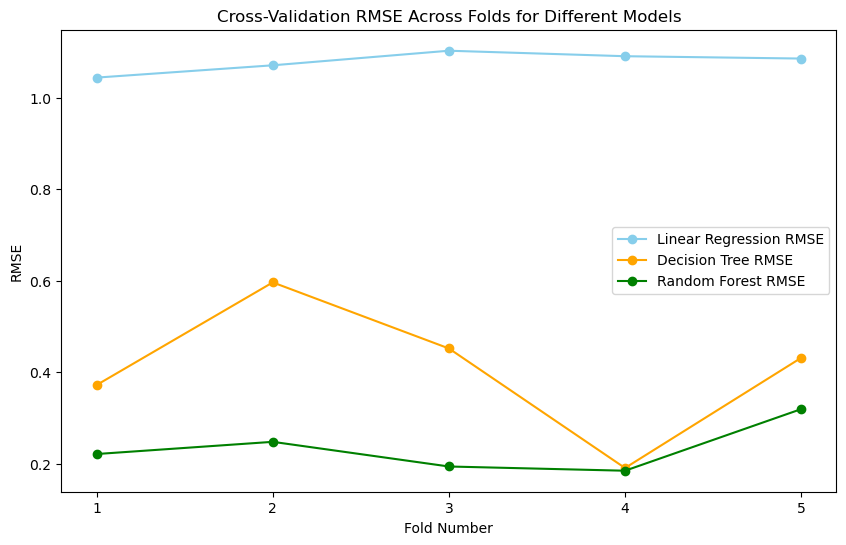

In [354]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation for Linear Regression
lin_scores = cross_val_score(lin_reg, X_train_selected, y_train, scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Linear Regression - Cross-validation RMSE:", lin_rmse_scores)

# Perform cross-validation for Decision Tree
dt_scores = cross_val_score(dt_model, X_train_selected, y_train, scoring="neg_mean_squared_error", cv=5)
dt_rmse_scores = np.sqrt(-dt_scores)
print("Decision Tree - Cross-validation RMSE:", dt_rmse_scores)

# Perform cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X_train_selected, y_train, scoring="neg_mean_squared_error", cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)
print("Random Forest - Cross-validation RMSE:", rf_rmse_scores)

# Convert scores to DataFrame for plotting
results_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Linear Regression': lin_rmse_scores,
    'Decision Tree': dt_rmse_scores,
    'Random Forest': rf_rmse_scores
})

# Plot RMSE values across folds for each model
plt.figure(figsize=(10, 6))
plt.plot(results_df['Fold'], results_df['Linear Regression'], marker='o', label="Linear Regression RMSE", color="skyblue")
plt.plot(results_df['Fold'], results_df['Decision Tree'], marker='o', label="Decision Tree RMSE", color="orange")
plt.plot(results_df['Fold'], results_df['Random Forest'], marker='o', label="Random Forest RMSE", color="green")

plt.title("Cross-Validation RMSE Across Folds for Different Models")
plt.xlabel("Fold Number")
plt.ylabel("RMSE")
plt.xticks(results_df['Fold'])
plt.legend()

plt.show()